In [ ]:
import numpy as np

from matplotlib import pyplot as plt
from scipy.cluster.hierarchy import dendrogram
from sklearn.datasets import load_iris
from sklearn.cluster import AgglomerativeClustering


def plot_dendrogram(model, **kwargs):
    # Create linkage matrix and then plot the dendrogram

    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack(
        [model.children_, model.distances_, counts]
    ).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)


iris = load_iris()
X = iris.data

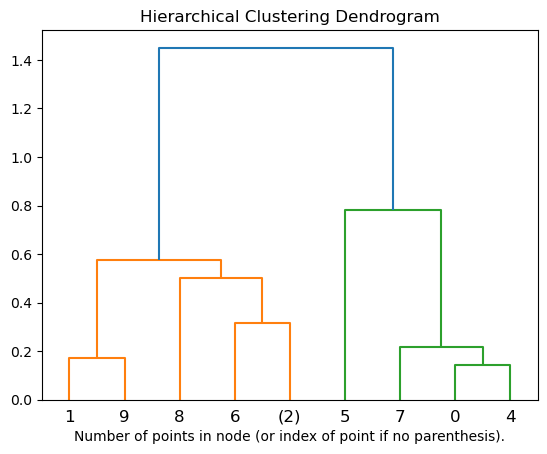

In [4]:

X=X[:10]
# setting distance_threshold=0 ensures we compute the full tree.
model = AgglomerativeClustering(distance_threshold=0, n_clusters=None)

model = model.fit(X)
plt.title("Hierarchical Clustering Dendrogram")
# plot the top three levels of the dendrogram
plot_dendrogram(model, truncate_mode="level", p=3)
plt.xlabel("Number of points in node (or index of point if no parenthesis).")
plt.show()

In [3]:
X[:10]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1]])

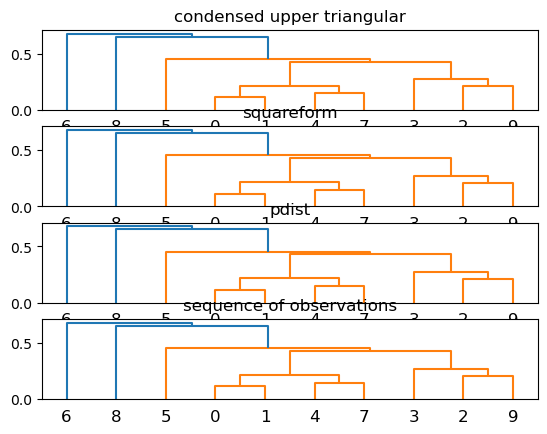

In [5]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.cluster import hierarchy as hier
from scipy.spatial import distance as ssd
np.random.seed(2016)

points = np.random.random((10, 2))
arr = ssd.cdist(points, points)

fig, ax = plt.subplots(nrows=4)

ax[0].set_title("condensed upper triangular")
Z = hier.linkage(arr[np.triu_indices(arr.shape[0], 1)], method="average")
hier.dendrogram(Z, ax=ax[0])

ax[1].set_title("squareform")
Z = hier.linkage(ssd.squareform(arr), method="average")
hier.dendrogram(Z, ax=ax[1])

ax[2].set_title("pdist")
Z = hier.linkage(ssd.pdist(points), method="average")
hier.dendrogram(Z, ax=ax[2])

ax[3].set_title("sequence of observations")
Z = hier.linkage(points, method="average")
hier.dendrogram(Z, ax=ax[3])

plt.show()

In [8]:
Z

array([[ 0.        ,  1.        ,  0.11400227,  2.        ],
       [ 4.        ,  7.        ,  0.14801254,  2.        ],
       [ 2.        ,  9.        ,  0.21054192,  2.        ],
       [10.        , 11.        ,  0.21653543,  4.        ],
       [ 3.        , 12.        ,  0.27114196,  3.        ],
       [13.        , 14.        ,  0.4292708 ,  7.        ],
       [ 5.        , 15.        ,  0.45457779,  8.        ],
       [ 8.        , 16.        ,  0.65057401,  9.        ],
       [ 6.        , 17.        ,  0.67757135, 10.        ]])

In [7]:
points

array([[0.89670536, 0.73023921],
       [0.78327576, 0.74165167],
       [0.4620905 , 0.64256513],
       [0.22486422, 0.70854663],
       [0.74712601, 0.62510742],
       [0.57995641, 0.24264034],
       [0.13195639, 0.14394847],
       [0.60363797, 0.58879082],
       [0.06934744, 0.94282887],
       [0.37259879, 0.45198934]])

In [6]:
arr

array([[0.        , 0.11400227, 0.44336985, 0.67219125, 0.18282963,
        0.58144867, 0.96362742, 0.32541687, 0.85423386, 0.59338915],
       [0.11400227, 0.        , 0.33612217, 0.55939198, 0.12202199,
        0.53884233, 0.88400567, 0.23587321, 0.7417317 , 0.50255332],
       [0.44336985, 0.33612217, 0.        , 0.24623132, 0.28556964,
        0.4169319 , 0.59800259, 0.15141785, 0.49437377, 0.21054192],
       [0.67219125, 0.55939198, 0.24623132, 0.        , 0.52888513,
        0.58579785, 0.57219135, 0.39725433, 0.28120035, 0.29605261],
       [0.18282963, 0.12202199, 0.28556964, 0.52888513, 0.        ,
        0.41740476, 0.78099141, 0.14801254, 0.74855241, 0.41260212],
       [0.58144867, 0.53884233, 0.4169319 , 0.58579785, 0.41740476,
        0.        , 0.45874187, 0.3469596 , 0.86659419, 0.29465943],
       [0.96362742, 0.88400567, 0.59800259, 0.57219135, 0.78099141,
        0.45874187, 0.        , 0.6483581 , 0.80133   , 0.39089377],
       [0.32541687, 0.23587321, 0.1514178

In [9]:
from scipy.cluster.hierarchy import dendrogram, linkage
from matplotlib import pyplot as plt
X = [[i] for i in [2, 8, 0, 4, 1, 9, 9, 0]]

In [10]:
X

[[2], [8], [0], [4], [1], [9], [9], [0]]

(150, 4)
(150, 1)


IndexError: index 1 is out of bounds for axis 1 with size 1

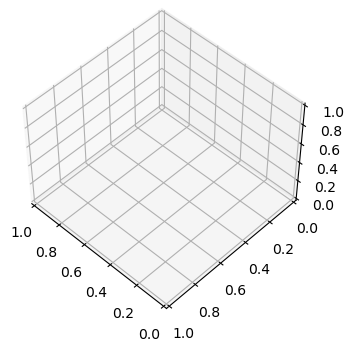

In [15]:
# Code source: Gaël Varoquaux
# License: BSD 3 clause

import numpy as np
import matplotlib.pyplot as plt


from sklearn import decomposition
from sklearn import datasets

# unused but required import for doing 3d projections with matplotlib < 3.2
import mpl_toolkits.mplot3d  # noqa: F401

np.random.seed(5)

iris = datasets.load_iris()
X = iris.data
print(X.shape)
y = iris.target

fig = plt.figure(1, figsize=(4, 3))
plt.clf()

ax = fig.add_subplot(111, projection="3d", elev=48, azim=134)
ax.set_position([0, 0, 0.95, 1])


plt.cla()
pca = decomposition.PCA(n_components=1)
pca.fit(X)
X = pca.transform(X)
print(X.shape)

for name, label in [("Setosa", 0), ("Versicolour", 1), ("Virginica", 2)]:
    ax.text3D(
        X[y == label, 0].mean(),
        X[y == label, 1].mean() + 1.5,
        X[y == label, 2].mean(),
        name,
        horizontalalignment="center",
        bbox=dict(alpha=0.5, edgecolor="w", facecolor="w"),
    )
# Reorder the labels to have colors matching the cluster results
y = np.choose(y, [1, 2, 0]).astype(float)
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=y, cmap=plt.cm.nipy_spectral, edgecolor="k")

ax.xaxis.set_ticklabels([])
ax.yaxis.set_ticklabels([])
ax.zaxis.set_ticklabels([])

plt.show()

In [12]:
X.shape

(150, 3)